# Linear Regression Analysis

Comprehensive guide to linear regression using Python, covering simple linear regression, multiple regression, interaction terms, and polynomial regression.

## Contents
1. Setup and Data Loading
2. Simple Linear Regression
3. Model Diagnostics
4. Multiple Linear Regression
5. Interaction Terms
6. Polynomial Regression
7. Qualitative Predictors

## Setup and Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load Boston Housing Dataset

In [3]:
# Load Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create DataFrame
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Boston = pd.DataFrame(data, columns=columns)
Boston['medv'] = target

print(f"Dataset shape: {Boston.shape}")
Boston.head()

Dataset shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Dataset info
print("Column names:")
print(Boston.columns.tolist())
print("\nDataset summary:")
Boston.describe()

Column names:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'medv']

Dataset summary:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Simple Linear Regression

Predicting median home value (medv) based on lower status percentage (LSTAT)

In [5]:
# Prepare data
X = Boston[['LSTAT']]
y = Boston['medv']

# Fit linear regression using statsmodels for detailed statistics
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           5.08e-88
Time:                        14:26:00   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [15]:
# Extract coefficients
print("Coefficients:")
print(f"Intercept: {model.params['const']:.4f}")
print(f"LSTAT coefficient: {model.params['LSTAT']:.4f}")

Coefficients:
Intercept: 34.5538
LSTAT coefficient: -0.9500


In [7]:
# Confidence intervals for coefficients
print("95% Confidence Intervals:")
print(model.conf_int())

95% Confidence Intervals:
               0          1
const  33.448457  35.659225
LSTAT  -1.026148  -0.873951


In [8]:
# Predictions with confidence and prediction intervals
new_data = pd.DataFrame({'LSTAT': [5, 10, 15]})
new_data_const = sm.add_constant(new_data)

# Predictions
predictions = model.predict(new_data_const)
print("Predictions for LSTAT = [5, 10, 15]:")
print(predictions)

# Confidence intervals (for mean response)
pred_summary = model.get_prediction(new_data_const)
conf_int = pred_summary.conf_int()
print("\n95% Confidence Intervals:")
print(conf_int)

# Prediction intervals (for individual response)
pred_int = pred_summary.conf_int(obs=True)
print("\n95% Prediction Intervals:")
print(pred_int)

Predictions for LSTAT = [5, 10, 15]:
0    29.803594
1    25.053347
2    20.303101
dtype: float64

95% Confidence Intervals:
[[29.00741194 30.59977628]
 [24.47413202 25.63256267]
 [19.73158815 20.87461299]]

95% Prediction Intervals:
[[17.56567478 42.04151344]
 [12.82762635 37.27906833]
 [ 8.0777421  32.52845905]]


## Visualization

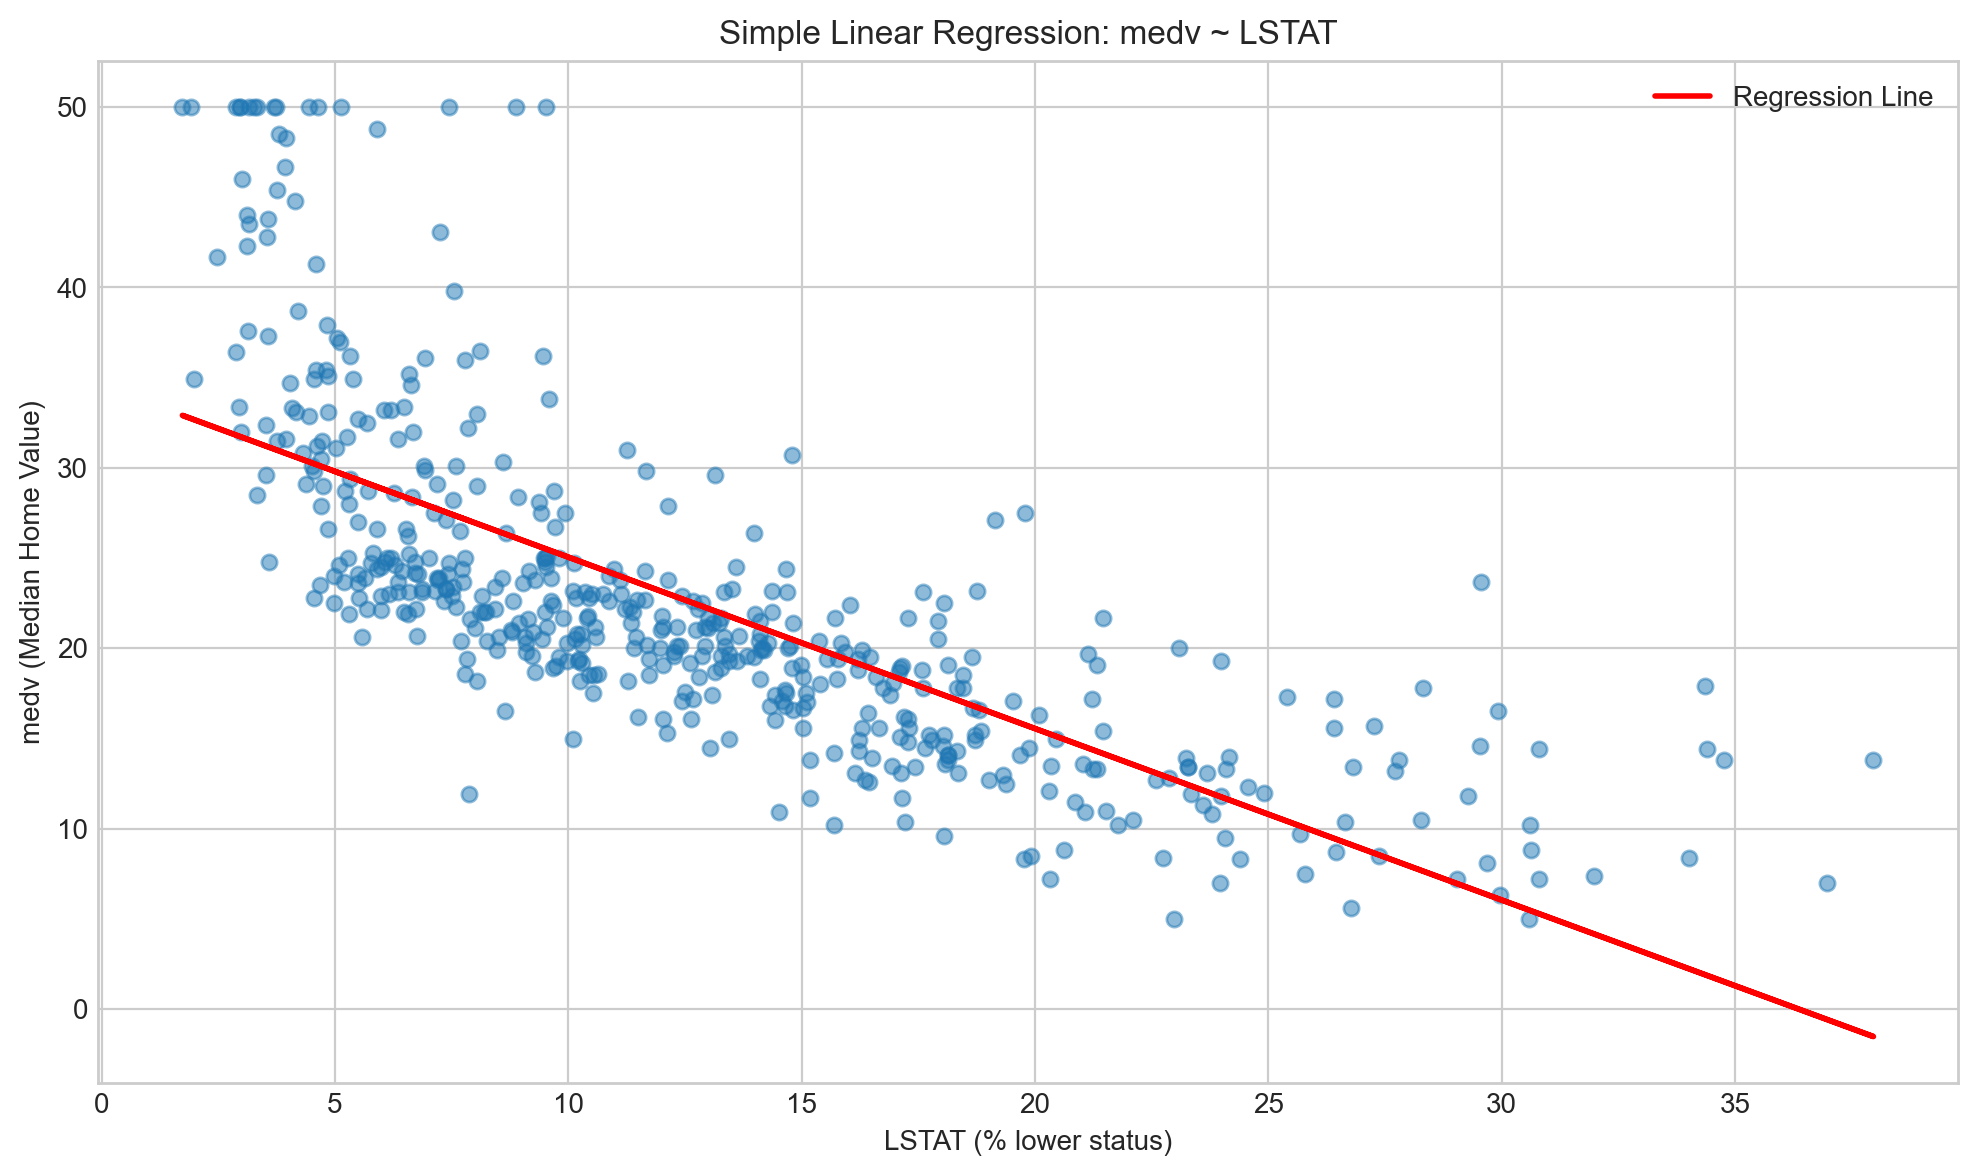

In [9]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(Boston['LSTAT'], Boston['medv'], alpha=0.5, s=30)
plt.plot(Boston['LSTAT'], model.fittedvalues, color='red', linewidth=2, label='Regression Line')
plt.xlabel('LSTAT (% lower status)')
plt.ylabel('medv (Median Home Value)')
plt.title('Simple Linear Regression: medv ~ LSTAT')
plt.legend()
plt.tight_layout()
plt.show()

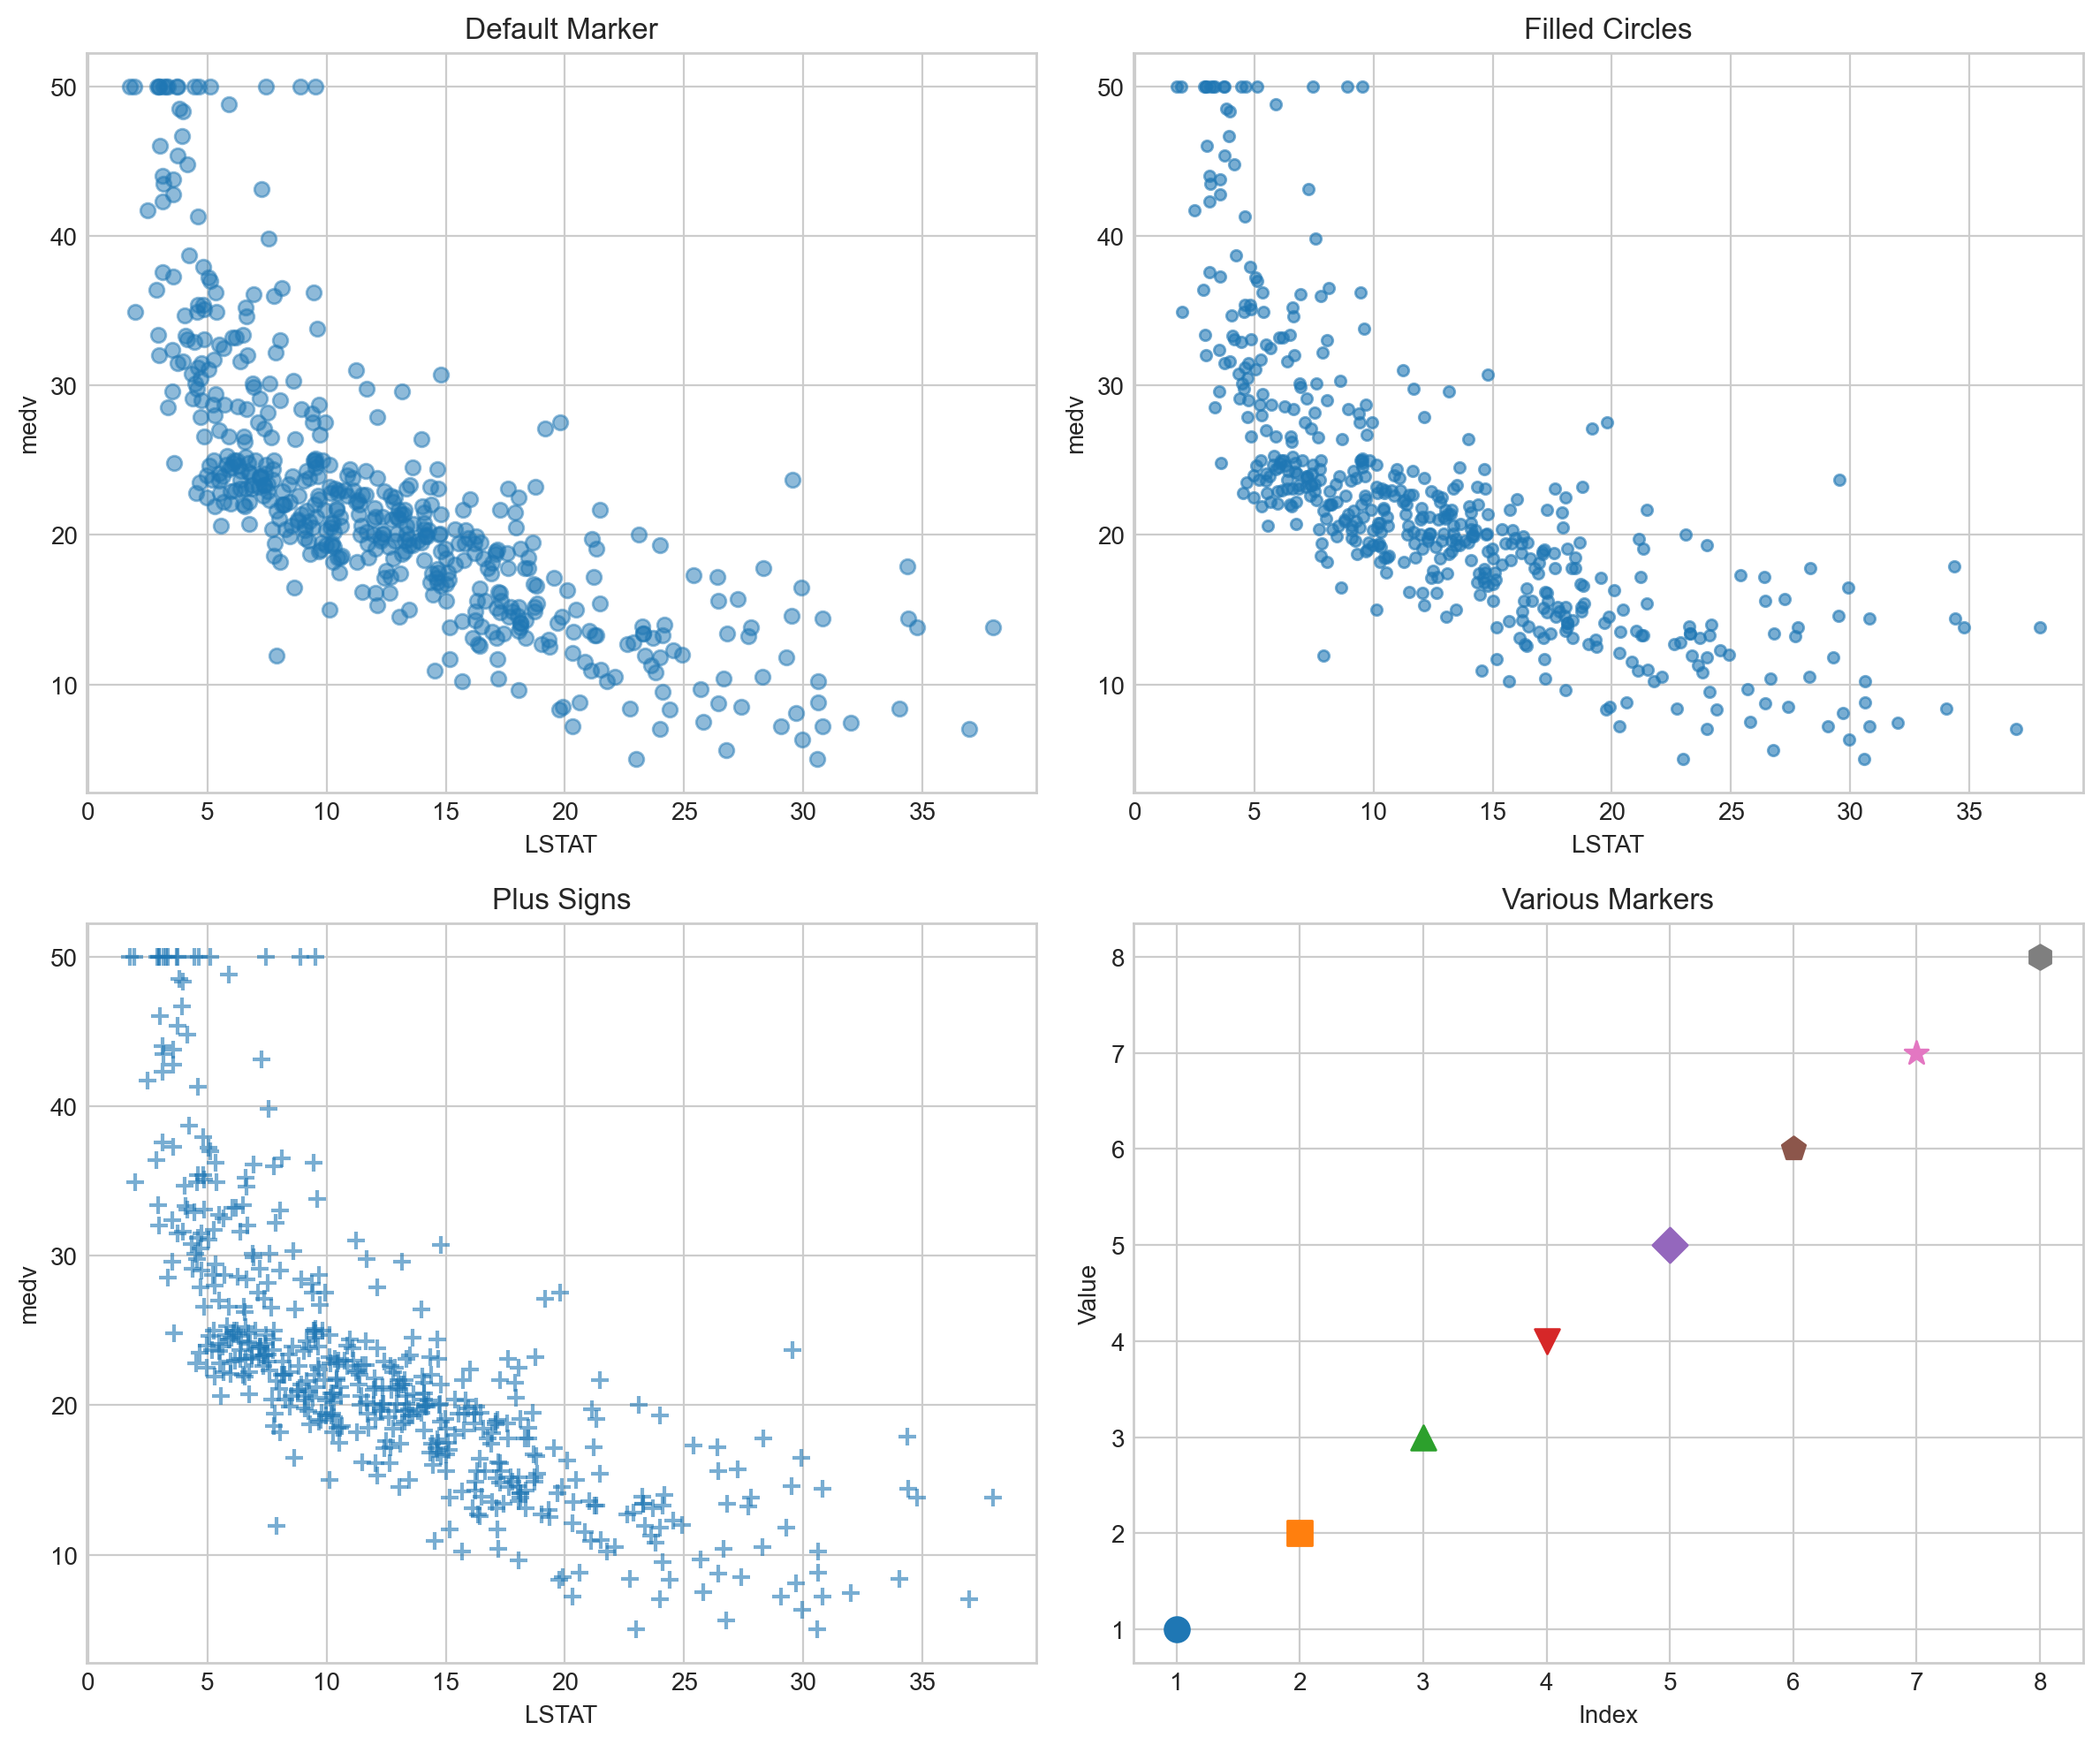

In [10]:
# Different plot markers
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Default marker
axes[0, 0].scatter(Boston['LSTAT'], Boston['medv'], alpha=0.5)
axes[0, 0].set_xlabel('LSTAT')
axes[0, 0].set_ylabel('medv')
axes[0, 0].set_title('Default Marker')

# Plot 2: Filled circles
axes[0, 1].scatter(Boston['LSTAT'], Boston['medv'], marker='o', s=20, alpha=0.6)
axes[0, 1].set_xlabel('LSTAT')
axes[0, 1].set_ylabel('medv')
axes[0, 1].set_title('Filled Circles')

# Plot 3: Plus signs
axes[1, 0].scatter(Boston['LSTAT'], Boston['medv'], marker='+', s=50, alpha=0.6)
axes[1, 0].set_xlabel('LSTAT')
axes[1, 0].set_ylabel('medv')
axes[1, 0].set_title('Plus Signs')

# Plot 4: Different markers
markers = ['o', 's', '^', 'v', 'D', 'p', '*', 'h']
for i in range(min(8, 25)):
    axes[1, 1].scatter(i+1, i+1, marker=markers[i % len(markers)], s=100)
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_title('Various Markers')

plt.tight_layout()
plt.show()

## Model Diagnostics

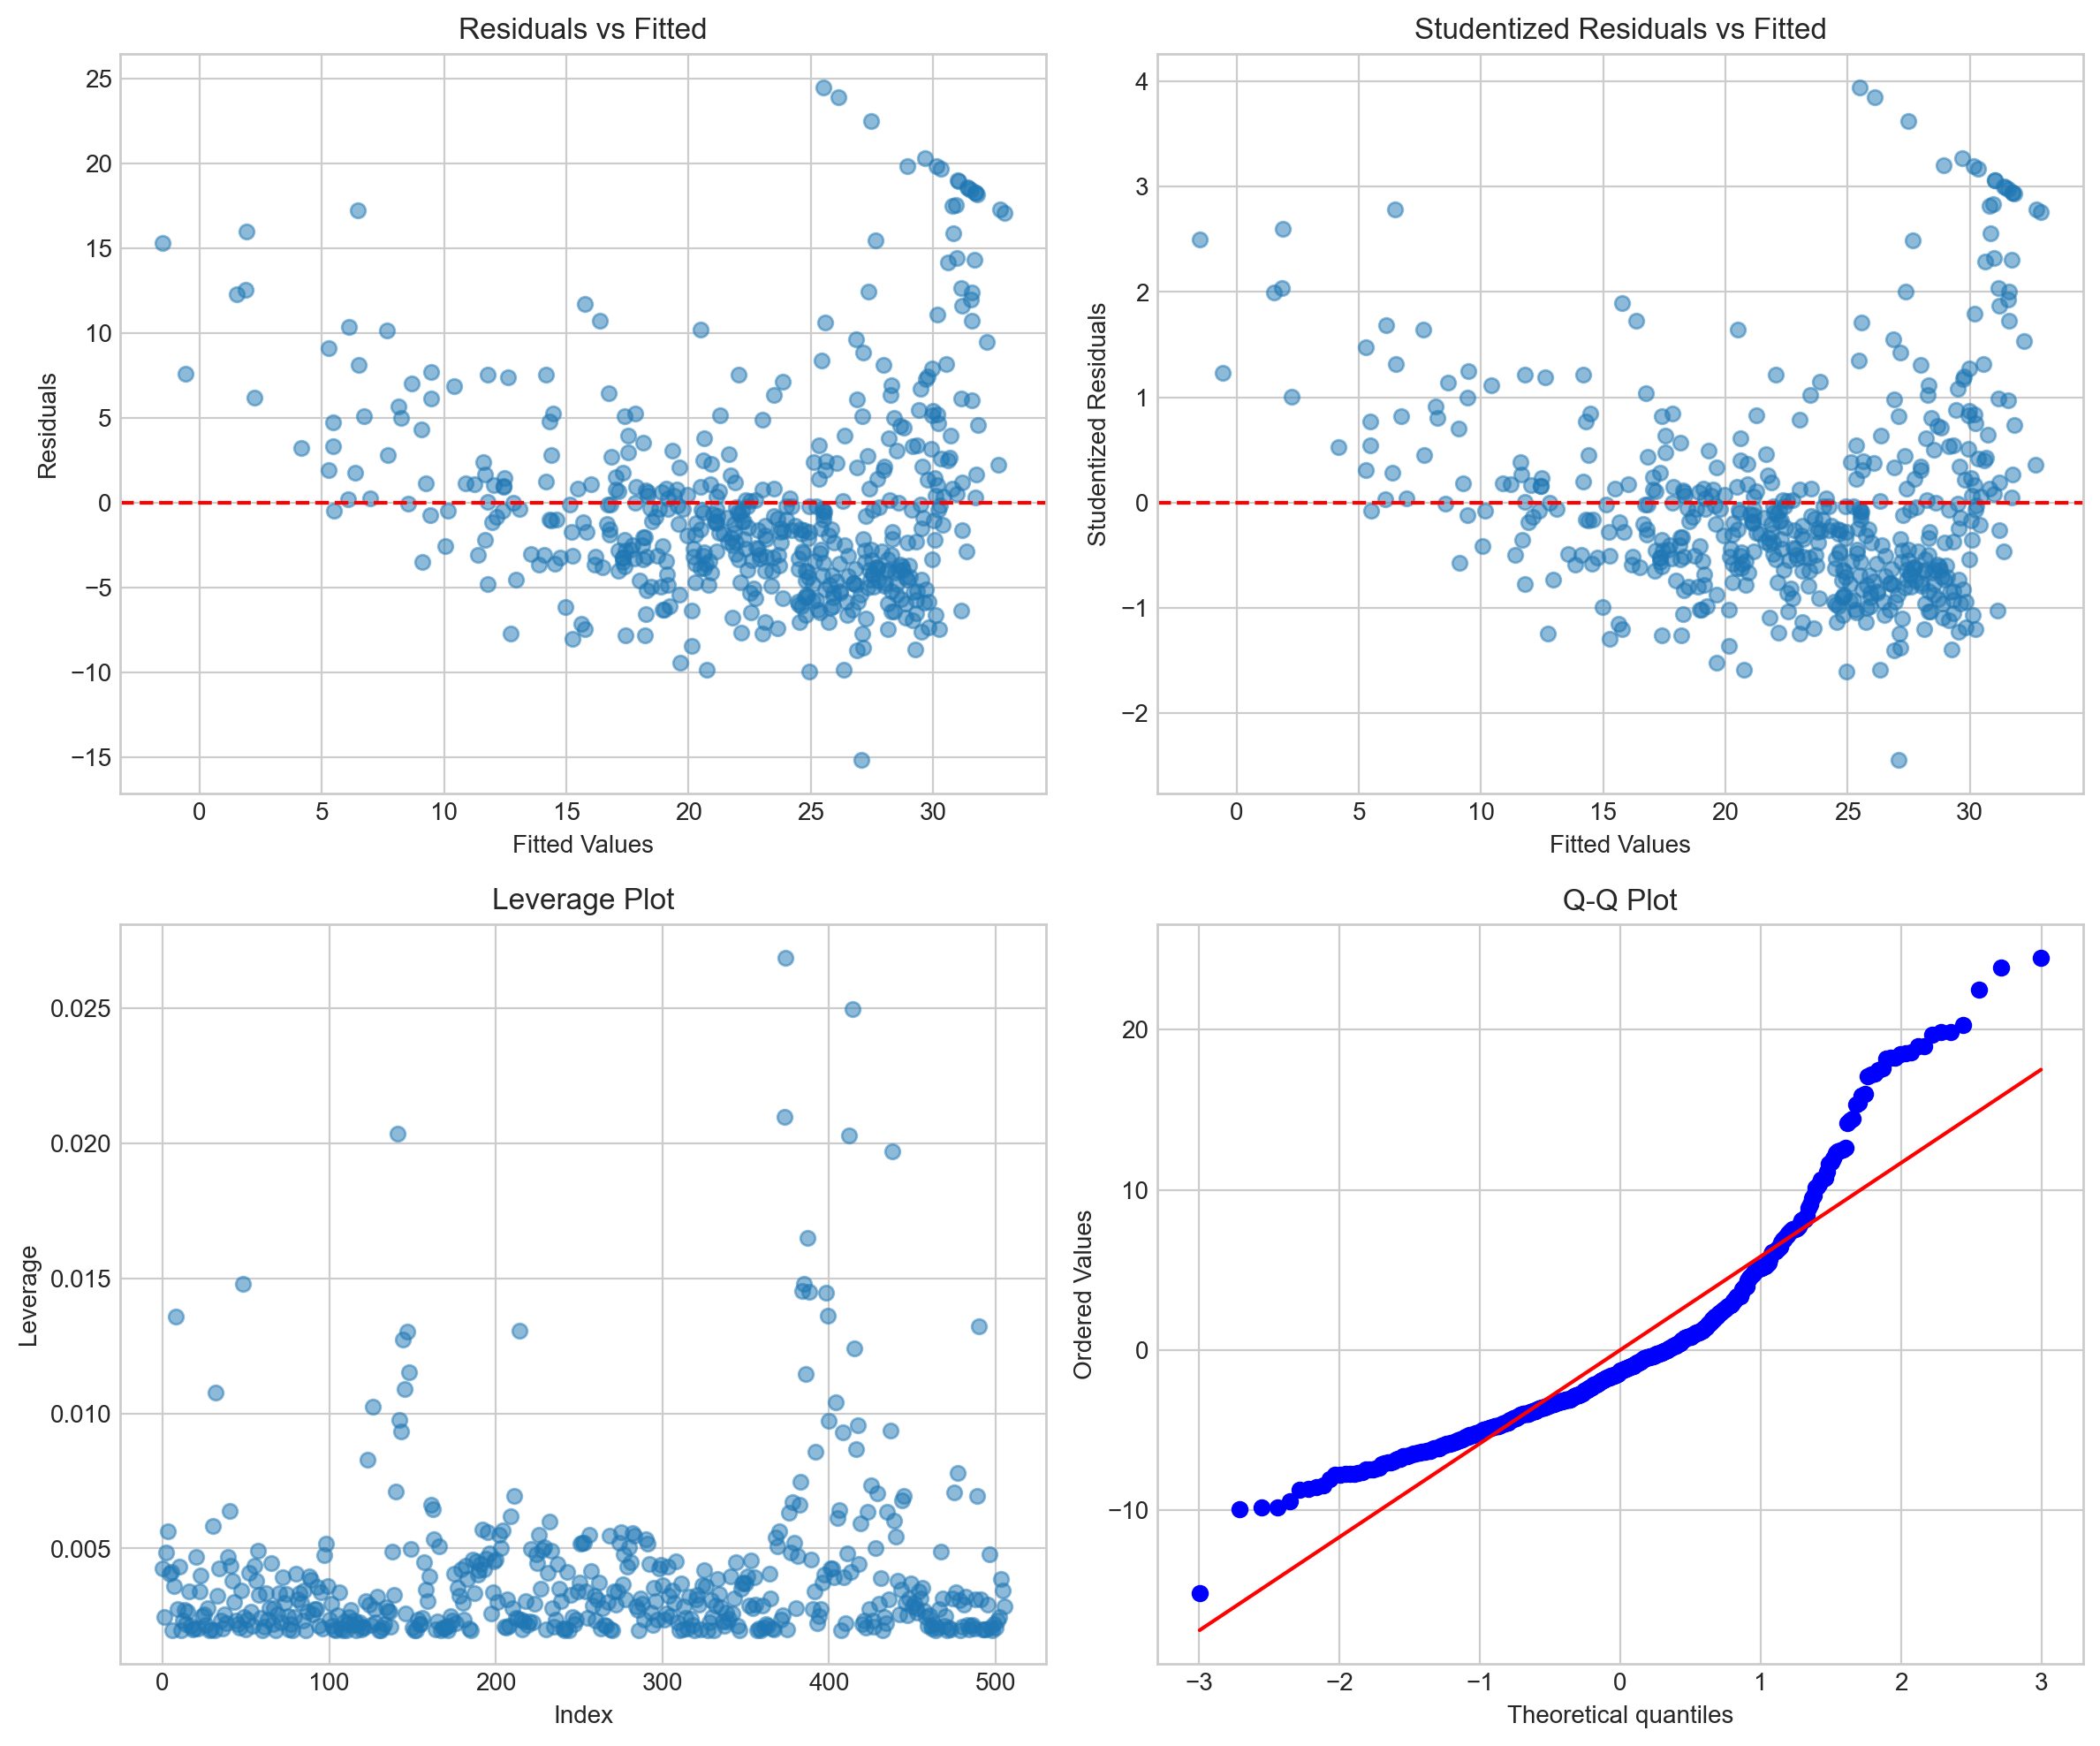

In [11]:
# Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
axes[0, 0].scatter(model.fittedvalues, model.resid, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# Studentized Residuals vs Fitted
student_resid = model.get_influence().resid_studentized_internal
axes[0, 1].scatter(model.fittedvalues, student_resid, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('Studentized Residuals')
axes[0, 1].set_title('Studentized Residuals vs Fitted')

# Leverage (Hat values)
leverage = model.get_influence().hat_matrix_diag
axes[1, 0].scatter(range(len(leverage)), leverage, alpha=0.5)
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Leverage')
axes[1, 0].set_title('Leverage Plot')

# Q-Q plot
stats.probplot(model.resid, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [12]:
# Find observation with highest leverage
max_leverage_idx = np.argmax(leverage)
print(f"Observation with highest leverage: {max_leverage_idx}")
print(f"Leverage value: {leverage[max_leverage_idx]:.4f}")

Observation with highest leverage: 374
Leverage value: 0.0269


## Multiple Linear Regression

In [13]:
# Regression with two predictors
X_multi = Boston[['LSTAT', 'AGE']]
X_multi_const = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi_const).fit()

print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           2.98e-88
Time:                        14:45:43   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [14]:
# Regression with all predictors
X_all = Boston.drop('medv', axis=1)
X_all_const = sm.add_constant(X_all)
model_all = sm.OLS(y, X_all_const).fit()

print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          6.72e-135
Time:                        14:45:47   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [ ]:
# Extract R-squared and RSE (residual standard error)
print(f"R-squared: {model_all.rsquared:.4f}")
print(f"Residual Std Error: {np.sqrt(model_all.mse_resid):.4f}")

In [ ]:
# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_all.columns
vif_data['VIF'] = [variance_inflation_factor(X_all.values, i) for i in range(X_all.shape[1])]

print("Variance Inflation Factors:")
print(vif_data.sort_values('VIF', ascending=False))

In [ ]:
# Regression excluding AGE
X_no_age = Boston.drop(['medv', 'AGE'], axis=1)
X_no_age_const = sm.add_constant(X_no_age)
model_no_age = sm.OLS(y, X_no_age_const).fit()

print(model_no_age.summary())

## Interaction Terms

In [ ]:
# Create interaction term: LSTAT * AGE
Boston['LSTAT_AGE'] = Boston['LSTAT'] * Boston['AGE']

X_interact = Boston[['LSTAT', 'AGE', 'LSTAT_AGE']]
X_interact_const = sm.add_constant(X_interact)
model_interact = sm.OLS(y, X_interact_const).fit()

print(model_interact.summary())

## Polynomial Regression

In [ ]:
# Quadratic fit: LSTAT + LSTAT^2
Boston['LSTAT2'] = Boston['LSTAT'] ** 2

X_quad = Boston[['LSTAT', 'LSTAT2']]
X_quad_const = sm.add_constant(X_quad)
model_quad = sm.OLS(y, X_quad_const).fit()

print(model_quad.summary())

In [ ]:
# Compare linear vs quadratic using ANOVA
print("ANOVA: Linear vs Quadratic")
print(f"Linear R²: {model.rsquared:.4f}")
print(f"Quadratic R²: {model_quad.rsquared:.4f}")
print(f"\nImprovement in R²: {model_quad.rsquared - model.rsquared:.4f}")

In [ ]:
# Visualize linear vs quadratic fit
plt.figure(figsize=(12, 6))

# Sort for smooth line plotting
sorted_idx = np.argsort(Boston['LSTAT'])
lstat_sorted = Boston['LSTAT'].iloc[sorted_idx]

plt.scatter(Boston['LSTAT'], Boston['medv'], alpha=0.3, label='Data')
plt.plot(lstat_sorted, model.fittedvalues.iloc[sorted_idx], 
         color='red', linewidth=2, label='Linear Fit')
plt.plot(lstat_sorted, model_quad.fittedvalues.iloc[sorted_idx], 
         color='green', linewidth=2, label='Quadratic Fit')
plt.xlabel('LSTAT')
plt.ylabel('medv')
plt.title('Linear vs Quadratic Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 5th order polynomial
poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly5 = poly.fit_transform(Boston[['LSTAT']])
X_poly5_const = sm.add_constant(X_poly5)
model_poly5 = sm.OLS(y, X_poly5_const).fit()

print("5th Order Polynomial:")
print(model_poly5.summary())

In [ ]:
# 6th order polynomial
poly6 = PolynomialFeatures(degree=6, include_bias=False)
X_poly6 = poly6.fit_transform(Boston[['LSTAT']])
X_poly6_const = sm.add_constant(X_poly6)
model_poly6 = sm.OLS(y, X_poly6_const).fit()

print("6th Order Polynomial:")
print(model_poly6.summary())

## Logarithmic Transformation

In [ ]:
# Log transformation
Boston['log_RM'] = np.log(Boston['RM'])

X_log = Boston[['log_RM']]
X_log_const = sm.add_constant(X_log)
model_log = sm.OLS(y, X_log_const).fit()

print(model_log.summary())

## Qualitative Predictors

In [ ]:
# Load Carseats dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv"
Carseats = pd.read_csv(url)

print(f"Dataset shape: {Carseats.shape}")
print("\nColumn names:")
print(Carseats.columns.tolist())
Carseats.head()

In [ ]:
# Check categorical variables
print("Unique values in ShelveLoc:")
print(Carseats['ShelveLoc'].value_counts())
print("\nUnique values in Urban:")
print(Carseats['Urban'].value_counts())
print("\nUnique values in US:")
print(Carseats['US'].value_counts())

In [ ]:
# Create dummy variables and interaction terms
# pandas automatically creates dummy variables when using formula interface
from statsmodels.formula.api import ols

# Regression with all variables plus interaction terms
formula = 'Sales ~ Income + Advertising + Price + Age + Income:Advertising + Price:Age + ShelveLoc + Urban + US + CompPrice + Population + Education'
model_carseats = ols(formula, data=Carseats).fit()

print(model_carseats.summary())

In [ ]:
# Show dummy variable encoding for ShelveLoc
print("Dummy variable encoding for ShelveLoc:")
print(pd.get_dummies(Carseats['ShelveLoc'], drop_first=True).head())
print("\nInterpretation:")
print("- Bad is the reference category (encoded as 0,0)")
print("- Good is encoded as (1,0)")
print("- Medium is encoded as (0,1)")

In [ ]:
# Extract and display coefficients
coefficients = pd.DataFrame({
    'Variable': model_carseats.params.index,
    'Coefficient': model_carseats.params.values,
    'P-value': model_carseats.pvalues.values
})

print("\nKey Coefficients:")
print(coefficients[coefficients['Variable'].str.contains('ShelveLoc')])
print("\nPositive coefficient for ShelveLoc[T.Good] indicates Good shelf location increases Sales")
print("Positive coefficient for ShelveLoc[T.Medium] indicates Medium shelf location also increases Sales, but less than Good")

## Summary

This notebook covered:
- Simple and multiple linear regression
- Model diagnostics and residual analysis
- Interaction terms between predictors
- Polynomial regression for non-linear relationships
- Logarithmic transformations
- Handling qualitative (categorical) predictors with dummy variables